In [1]:
!pip3 install librosa
!pip3 install numba>=0.53

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import librosa
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "/content/jno-E45-LFRH-22-272-0836-1006-fnl (1).wav"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(260848,) 22050


In [4]:
librosa.load(audio_data, sr=44100)

(array([-0.00393779, -0.00216301,  0.00120264, ...,  0.0060122 ,
         0.00361361,  0.00150867], dtype=float32),
 44100)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

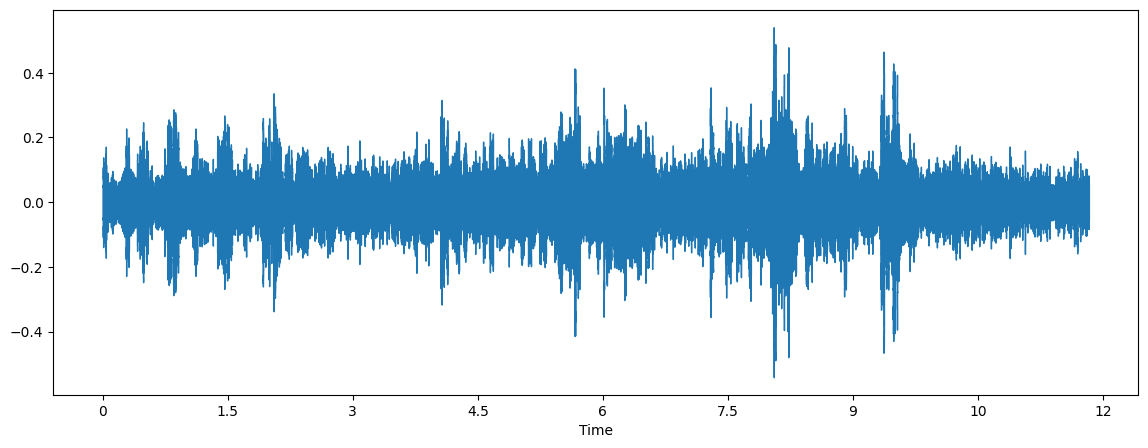

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#**Short-time Fourier transform (STFT)**

In [7]:
#https://librosa.org/doc-playground/main/generated/librosa.feature.chroma_stft.html?highlight=ibrosa%20feature%20chroma_stft#librosa.feature.chroma_stft
#Energy
librosa.feature.chroma_stft(y=x, sr=sr)

array([[0.61634874, 0.48492843, 0.51474786, ..., 0.66164017, 0.9255944 ,
        0.5781911 ],
       [0.48286736, 0.58702487, 0.63596094, ..., 0.706573  , 0.7727074 ,
        0.5135408 ],
       [0.34135595, 0.4460975 , 0.6792503 , ..., 0.632739  , 1.        ,
        0.5355197 ],
       ...,
       [0.5258019 , 0.75280136, 1.        , ..., 0.869     , 0.68389076,
        0.29304838],
       [1.        , 1.        , 0.81229   , ..., 0.5610648 , 0.96992904,
        0.51793605],
       [0.54446876, 0.33025807, 0.3038768 , ..., 0.4540473 , 0.9052126 ,
        0.5509836 ]], dtype=float32)

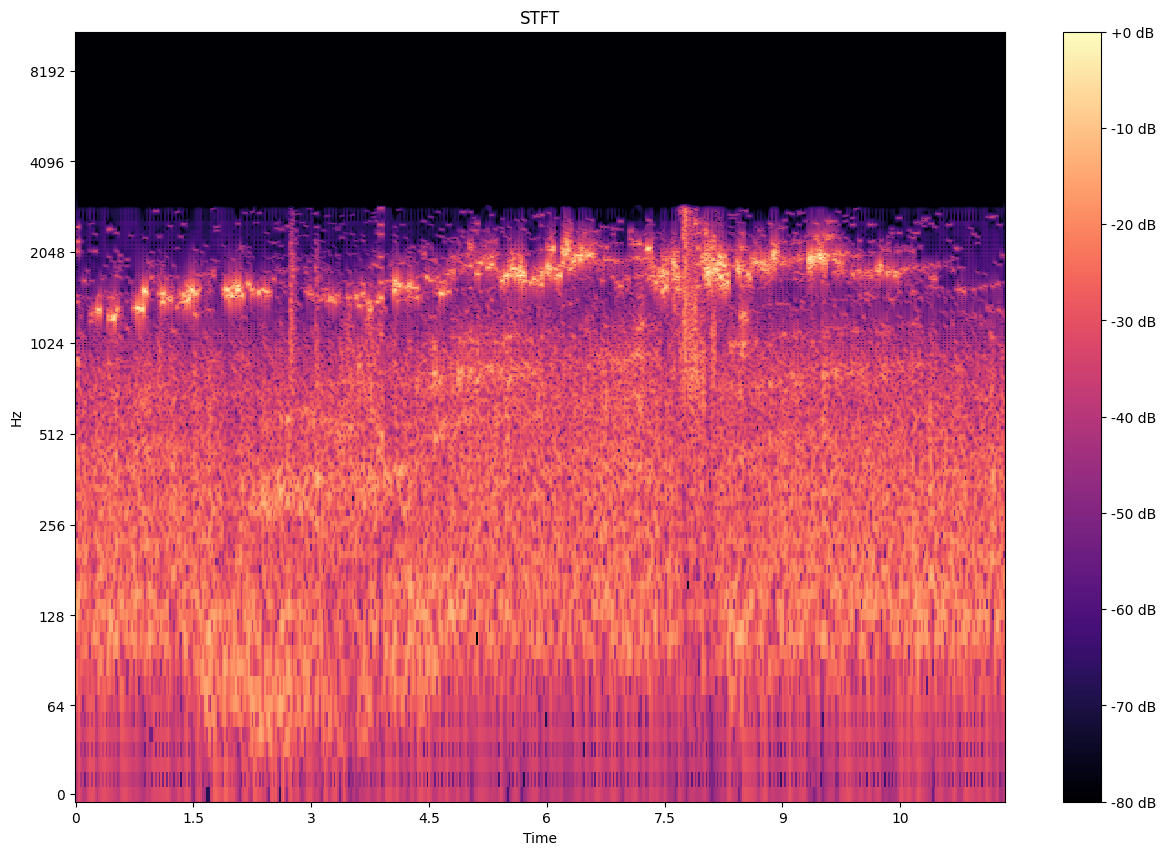

In [8]:
stft_result = librosa.stft(y=x)

stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()

#**MFCCs**

(20, 510)


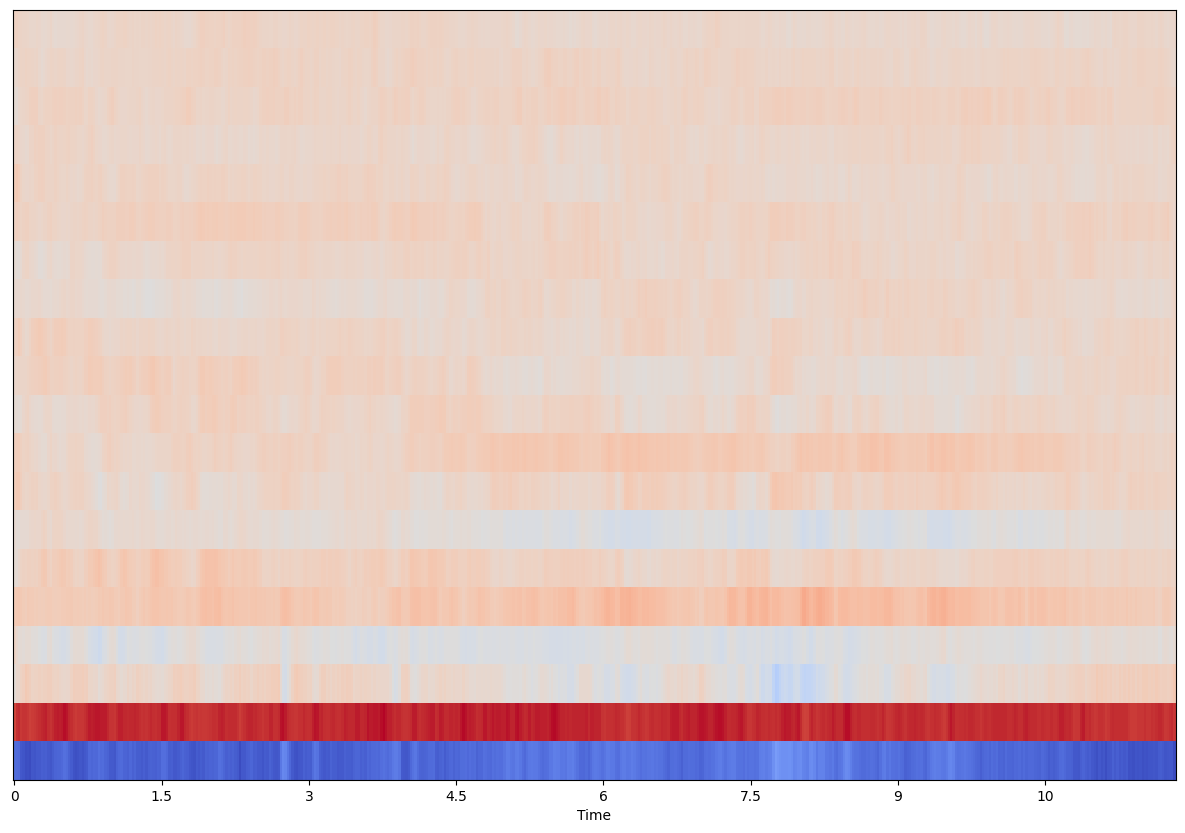

In [9]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [10]:
mfccs

array([[-3.1639078e+02, -3.1850870e+02, -3.2111038e+02, ...,
        -3.4605145e+02, -3.4581390e+02, -3.6543951e+02],
       [ 2.3168088e+02,  2.5576953e+02,  2.6087823e+02, ...,
         2.5545044e+02,  2.5967148e+02,  2.4948849e+02],
       [-2.6037407e+01, -1.0992561e+01, -9.9534512e+00, ...,
         1.1209778e+01,  1.7522583e+01,  3.2058765e+01],
       ...,
       [-2.1686966e+01, -2.2709099e+01, -1.0427998e+01, ...,
         1.8226734e+00,  2.5473598e-01, -1.3080897e+00],
       [-1.2636904e+01, -1.0076095e+01, -4.0907421e+00, ...,
        -6.2259955e+00, -9.9953775e+00, -1.4743212e+01],
       [ 4.4997015e+00,  5.6616116e+00, -7.7035093e-01, ...,
        -1.0567598e+01, -1.0403496e+01, -7.3807125e+00]], dtype=float32)

In [11]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 510)


In [12]:
mfccs

array([[-3.1639078e+02, -3.1850870e+02, -3.2111038e+02, ...,
        -3.4605145e+02, -3.4581390e+02, -3.6543951e+02],
       [ 2.3168088e+02,  2.5576953e+02,  2.6087823e+02, ...,
         2.5545044e+02,  2.5967148e+02,  2.4948849e+02],
       [-2.6037407e+01, -1.0992561e+01, -9.9534512e+00, ...,
         1.1209778e+01,  1.7522583e+01,  3.2058765e+01],
       ...,
       [-2.1686966e+01, -2.2709099e+01, -1.0427998e+01, ...,
         1.8226734e+00,  2.5473598e-01, -1.3080897e+00],
       [-1.2636904e+01, -1.0076095e+01, -4.0907421e+00, ...,
        -6.2259955e+00, -9.9953775e+00, -1.4743212e+01],
       [ 4.4997015e+00,  5.6616116e+00, -7.7035093e-01, ...,
        -1.0567598e+01, -1.0403496e+01, -7.3807125e+00]], dtype=float32)

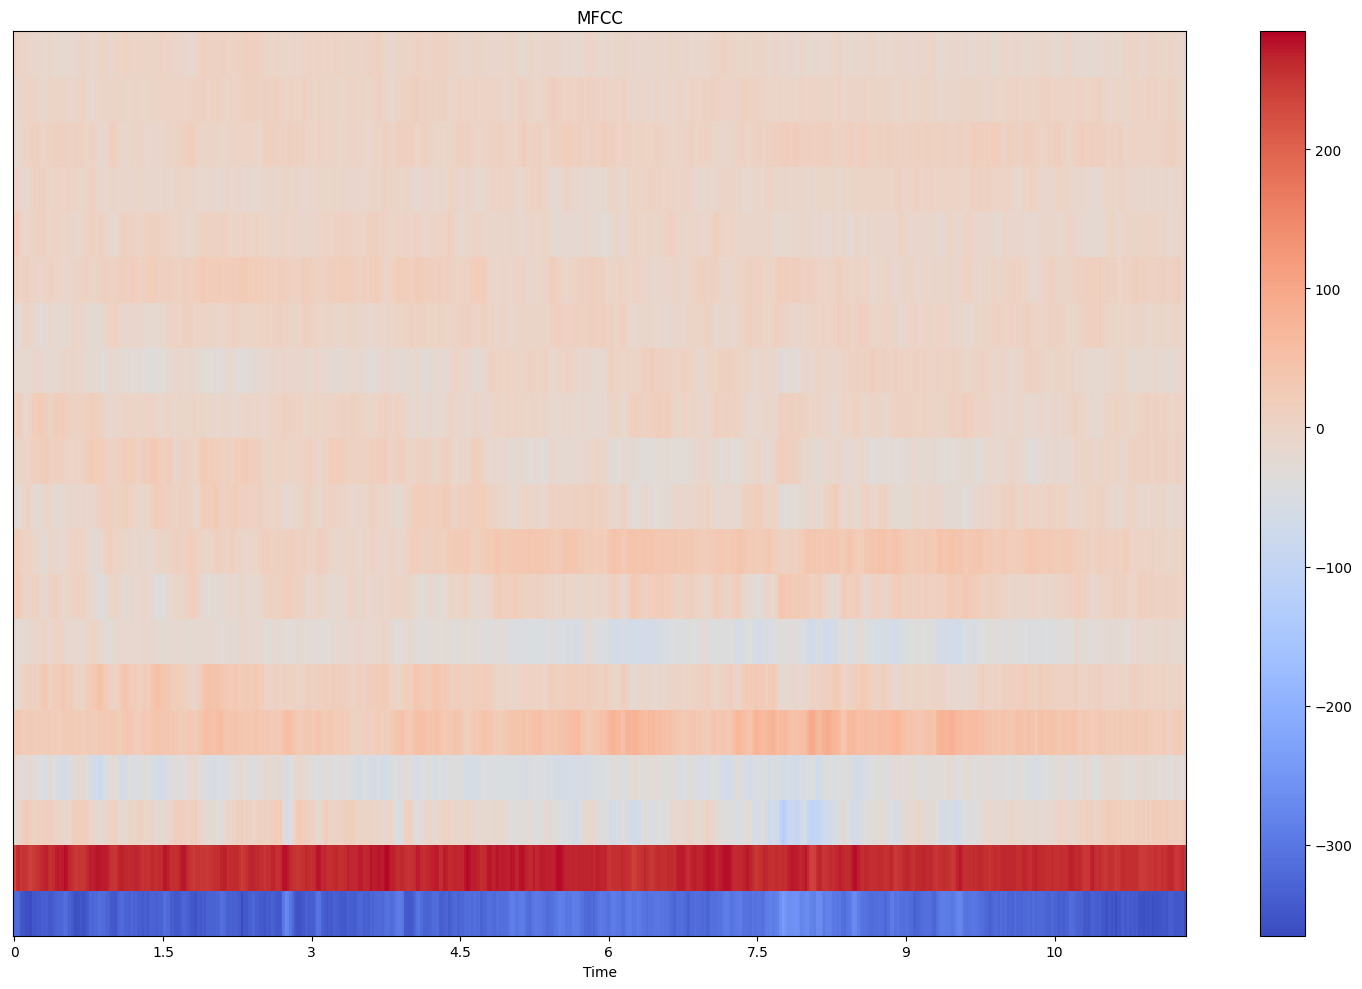

In [13]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

#**Spectrogram**

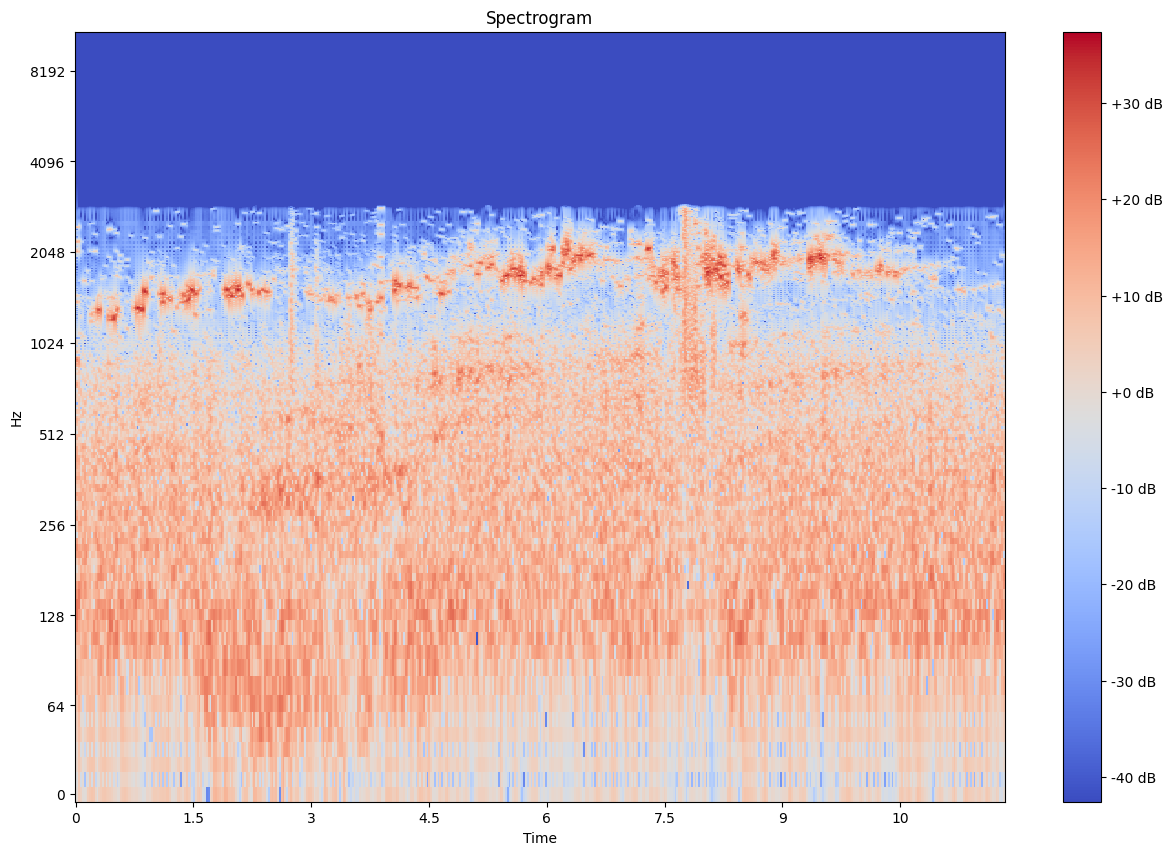

In [14]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [15]:
X

array([[ 2.9153874e-02+0.00000000e+00j, -9.4478714e-01+0.00000000e+00j,
        -1.8554453e+00+0.00000000e+00j, ...,
        -6.0516071e-01+0.00000000e+00j, -5.7281518e-01+0.00000000e+00j,
        -9.4542527e-01+0.00000000e+00j],
       [-2.1500491e-02-2.28052512e-01j,  1.6916381e-02-7.44504392e-01j,
         1.8728164e+00-1.63451448e-01j, ...,
        -1.9201282e-01-8.47929120e-02j,  4.3870369e-01+1.04197450e-01j,
         4.0177119e-01-4.71473783e-01j],
       [ 1.2892091e-01+4.76297051e-01j,  9.8144555e-01-5.21450162e-01j,
        -2.0122035e+00+3.32468182e-01j, ...,
         6.2462872e-01+5.39550543e-01j, -6.3565683e-01-5.59086800e-01j,
         3.0772382e-01+1.08092654e+00j],
       ...,
       [-2.4359946e-03+9.64211904e-06j,  1.2156354e-03-4.97133396e-06j,
        -9.8488741e-08+1.06398865e-07j, ...,
        -6.0810734e-08+3.10014165e-08j,  1.0212459e-05+1.05559986e-04j,
        -5.4126696e-05-5.59685752e-04j],
       [ 2.4359864e-03-4.76721152e-06j, -2.2570189e-06-1.21540343e-0

In [16]:
Xdb

array([[-30.706074  ,  -0.4933204 ,   5.368963  , ...,  -4.3625855 ,
         -4.83971   ,  -0.48745596],
       [-12.80087   ,  -2.5604131 ,   5.4828587 , ..., -13.559677  ,
         -6.9182405 ,  -4.1599965 ],
       [ -6.135377  ,   0.9171815 ,   6.1904097 , ...,  -1.6667705 ,
         -1.4470036 ,   1.014363  ],
       ...,
       [-42.588737  , -42.588737  , -42.588737  , ..., -42.588737  ,
        -42.588737  , -42.588737  ],
       [-42.588737  , -42.588737  , -42.588737  , ..., -42.588737  ,
        -42.588737  , -42.588737  ],
       [-42.588737  , -42.588737  , -42.588737  , ..., -42.588737  ,
        -42.588737  , -42.588737  ]], dtype=float32)

#**Chromagram**

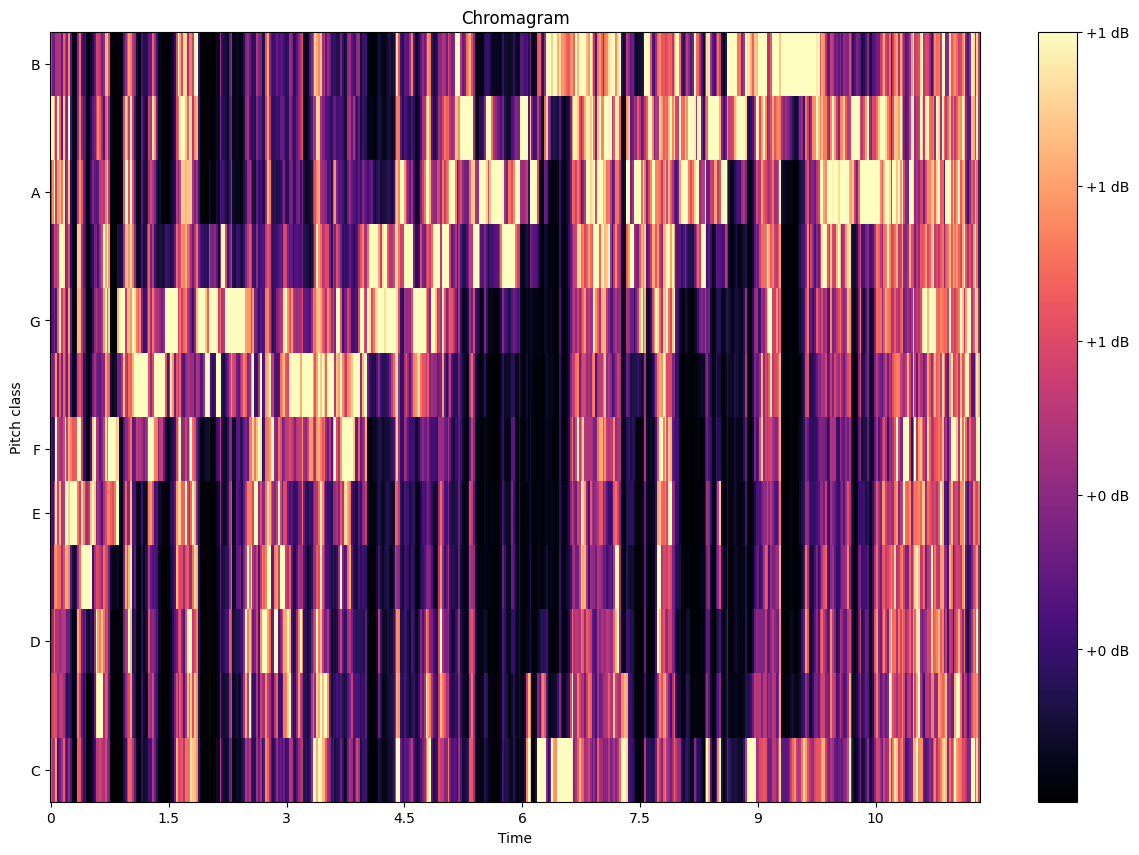

In [17]:
chroma_db = librosa.feature.chroma_stft(y=x, sr=sr)

plt.figure(figsize=(15, 10))
librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Chromagram')
plt.show()

In [18]:
chroma_db

array([[0.61634874, 0.48492843, 0.51474786, ..., 0.66164017, 0.9255944 ,
        0.5781911 ],
       [0.48286736, 0.58702487, 0.63596094, ..., 0.706573  , 0.7727074 ,
        0.5135408 ],
       [0.34135595, 0.4460975 , 0.6792503 , ..., 0.632739  , 1.        ,
        0.5355197 ],
       ...,
       [0.5258019 , 0.75280136, 1.        , ..., 0.869     , 0.68389076,
        0.29304838],
       [1.        , 1.        , 0.81229   , ..., 0.5610648 , 0.96992904,
        0.51793605],
       [0.54446876, 0.33025807, 0.3038768 , ..., 0.4540473 , 0.9052126 ,
        0.5509836 ]], dtype=float32)

#**Mel-Scaled Spectrogram**

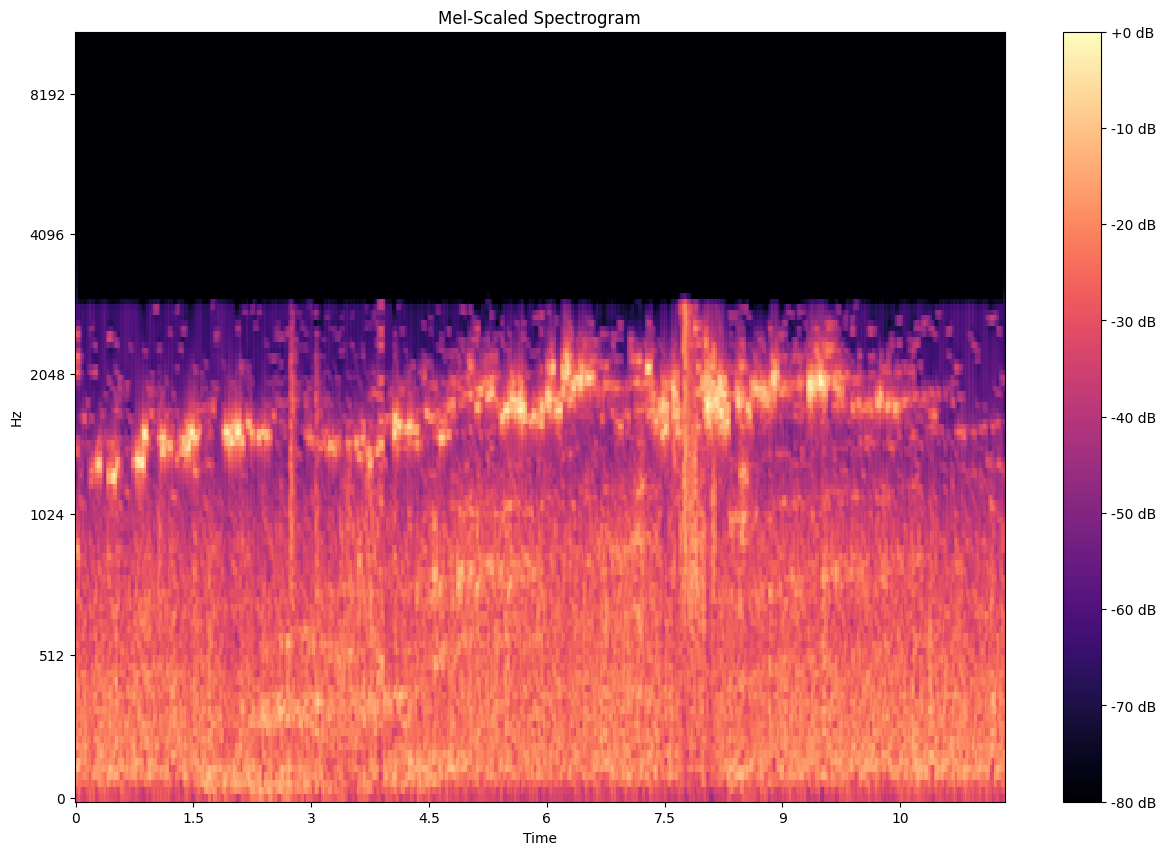

In [19]:
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Scaled Spectrogram')
plt.show()

In [20]:
mel_spectrogram

array([[3.95852923e-02, 1.10066697e-01, 4.21354324e-01, ...,
        5.27004711e-02, 6.57515526e-02, 1.06540814e-01],
       [2.43720934e-01, 3.33501637e-01, 8.34967971e-01, ...,
        1.23108491e-01, 2.31139362e-01, 3.51933688e-01],
       [6.64399445e-01, 1.48397791e+00, 8.78724694e-01, ...,
        3.74876916e-01, 1.05329776e+00, 1.09519494e+00],
       ...,
       [5.66498443e-07, 1.41066337e-07, 2.62492652e-15, ...,
        3.16302389e-15, 1.08213427e-09, 3.05009991e-08],
       [5.58404508e-07, 1.39053498e-07, 9.93769716e-15, ...,
        1.27206536e-14, 1.06009790e-09, 2.98794802e-08],
       [5.53210100e-07, 1.37762427e-07, 4.06776646e-15, ...,
        4.02828329e-15, 1.04605469e-09, 2.94838109e-08]], dtype=float32)

In [21]:
mel_spectrogram_db

array([[-37.309937, -32.868717, -27.038803, ..., -36.06713 , -35.106216,
        -33.010117],
       [-29.416348, -28.054296, -24.068579, ..., -32.382397, -29.646538,
        -27.820667],
       [-25.060984, -21.571003, -23.846748, ..., -27.54639 , -23.059765,
        -22.890362],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

#**Beat Tracker**

Detected Tempo: [172.265625] BPM


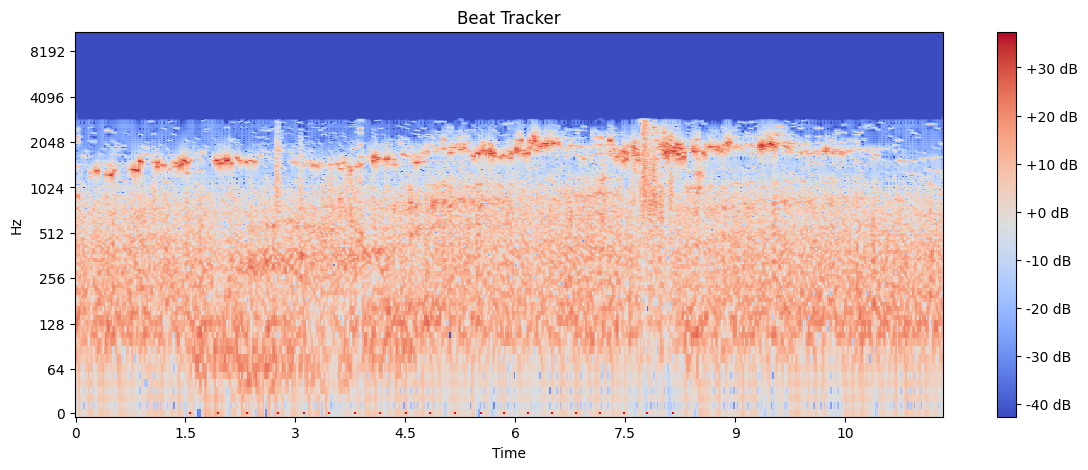

In [22]:
tempo, beats = librosa.beat.beat_track(y=x, sr=sr)

print(f"Detected Tempo: {tempo} BPM")

# Plot beat locations on the waveform
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r')
plt.colorbar(format='%+2.0f dB')
plt.title('Beat Tracker')
plt.show()

#**Constant-Q Transform**

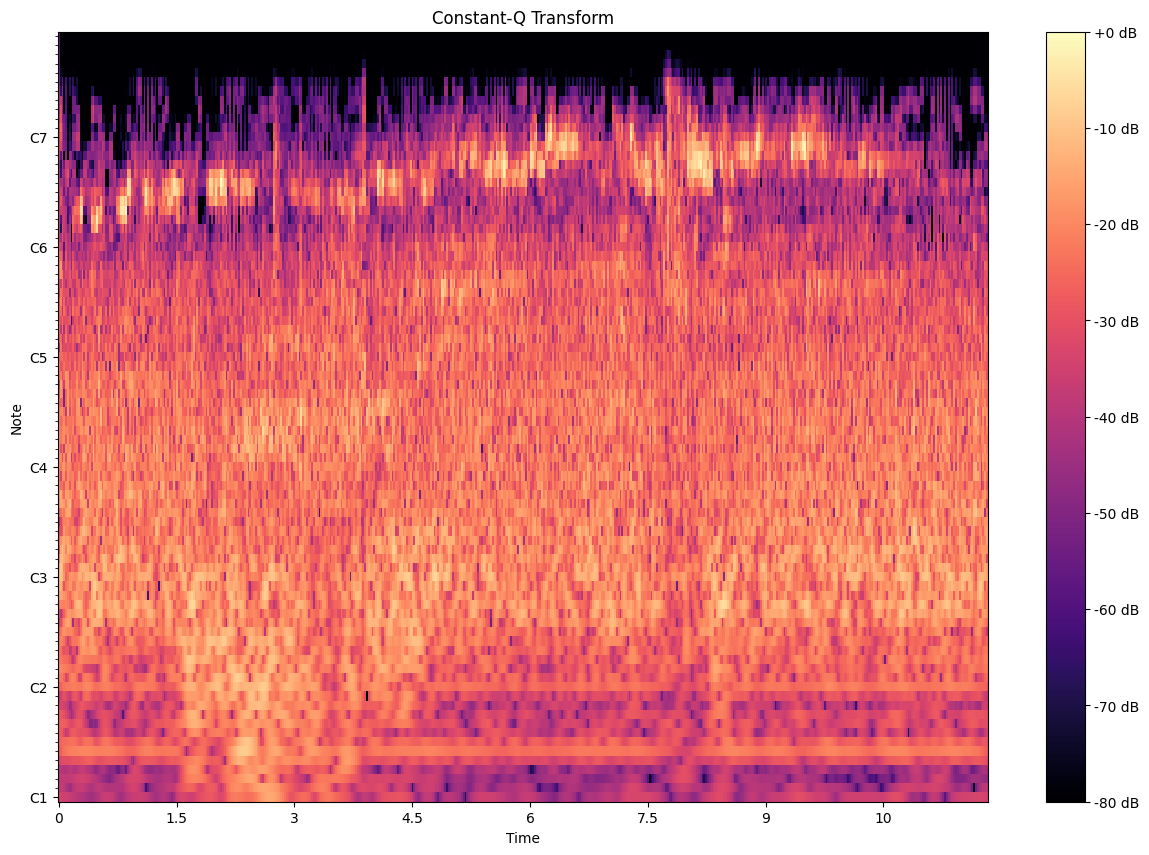

In [23]:
CQT = librosa.cqt(y=x, sr=sr)

CQT_db = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(CQT_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.show()

In [24]:
CQT

array([[ 3.4336224e-02-7.9507579e-04j,  3.6642039e-05-3.4875467e-02j,
        -3.4755524e-02-1.3589902e-03j, ...,
        -1.4083189e-02-3.6807276e-02j, -3.4769855e-02+1.4430656e-02j,
         1.3692761e-02+3.2028746e-02j],
       [ 2.6002808e-02-6.9529824e-03j,  1.3183263e-03-2.7162896e-02j,
        -2.4316151e-02-8.5697360e-03j, ...,
        -9.2553822e-03-1.8233484e-02j, -2.1100681e-02+4.8777810e-03j,
         3.8415750e-05+2.1751473e-02j],
       [ 1.5985716e-02-1.4136355e-02j, -2.5301916e-03-2.3335142e-02j,
        -2.1180434e-02-1.2832453e-02j, ...,
        -6.5180105e-03-8.0196382e-03j, -9.1867717e-03+1.5940305e-03j,
        -2.4759243e-03+8.1890114e-03j],
       ...,
       [-1.6463761e-03+2.3283588e-03j, -1.2422376e-05+1.1531914e-05j,
         5.8128408e-06-2.0999219e-05j, ...,
         5.3604685e-06-8.2855231e-06j, -1.5307749e-06-7.4730693e-08j,
         1.5355557e-06-4.4518579e-06j],
       [-1.5549193e-03+2.0182624e-03j,  6.8860472e-06-4.5944948e-06j,
        -7.3550345e-06

In [25]:
CQT_db

array([[-34.977524, -34.8445  , -34.86779 , ..., -33.78288 , -34.180634,
        -34.855106],
       [-37.09458 , -37.005165, -37.468544, ..., -39.481873, -38.982883,
        -38.945118],
       [-39.111168, -38.283936, -37.8183  , ..., -45.40923 , -46.302822,
        -47.05038 ],
       ...,
       [-56.593033, -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-57.571682, -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-58.480976, -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)